In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/student-performance-data-set/student-por.csv")

In [3]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Метрики

Мы предсказываем переменную G3, из чего следует, что мы решаем задачу линейной регресии.

Значит мы используем метрики MSE и R<sup>2</sup>:
* MSE - для того, чтобы узнать общее качество модели (стандартная метрика для задачи линейной регрессии)
* R<sup>2</sup> - для того, чтобы узнать, насколько наша модель лучше стандартного предсказания. 

## EDA

In [4]:
data.dtypes


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Text(0.5, 1.0, 'G3 - Number of students')

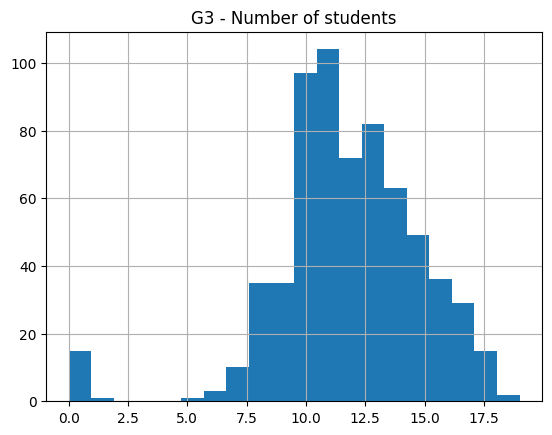

In [7]:
data["G3"].hist(bins=20)
plt.title('G3 - Number of students')

Text(0.5, 1.0, 'Correlation Heatmap')

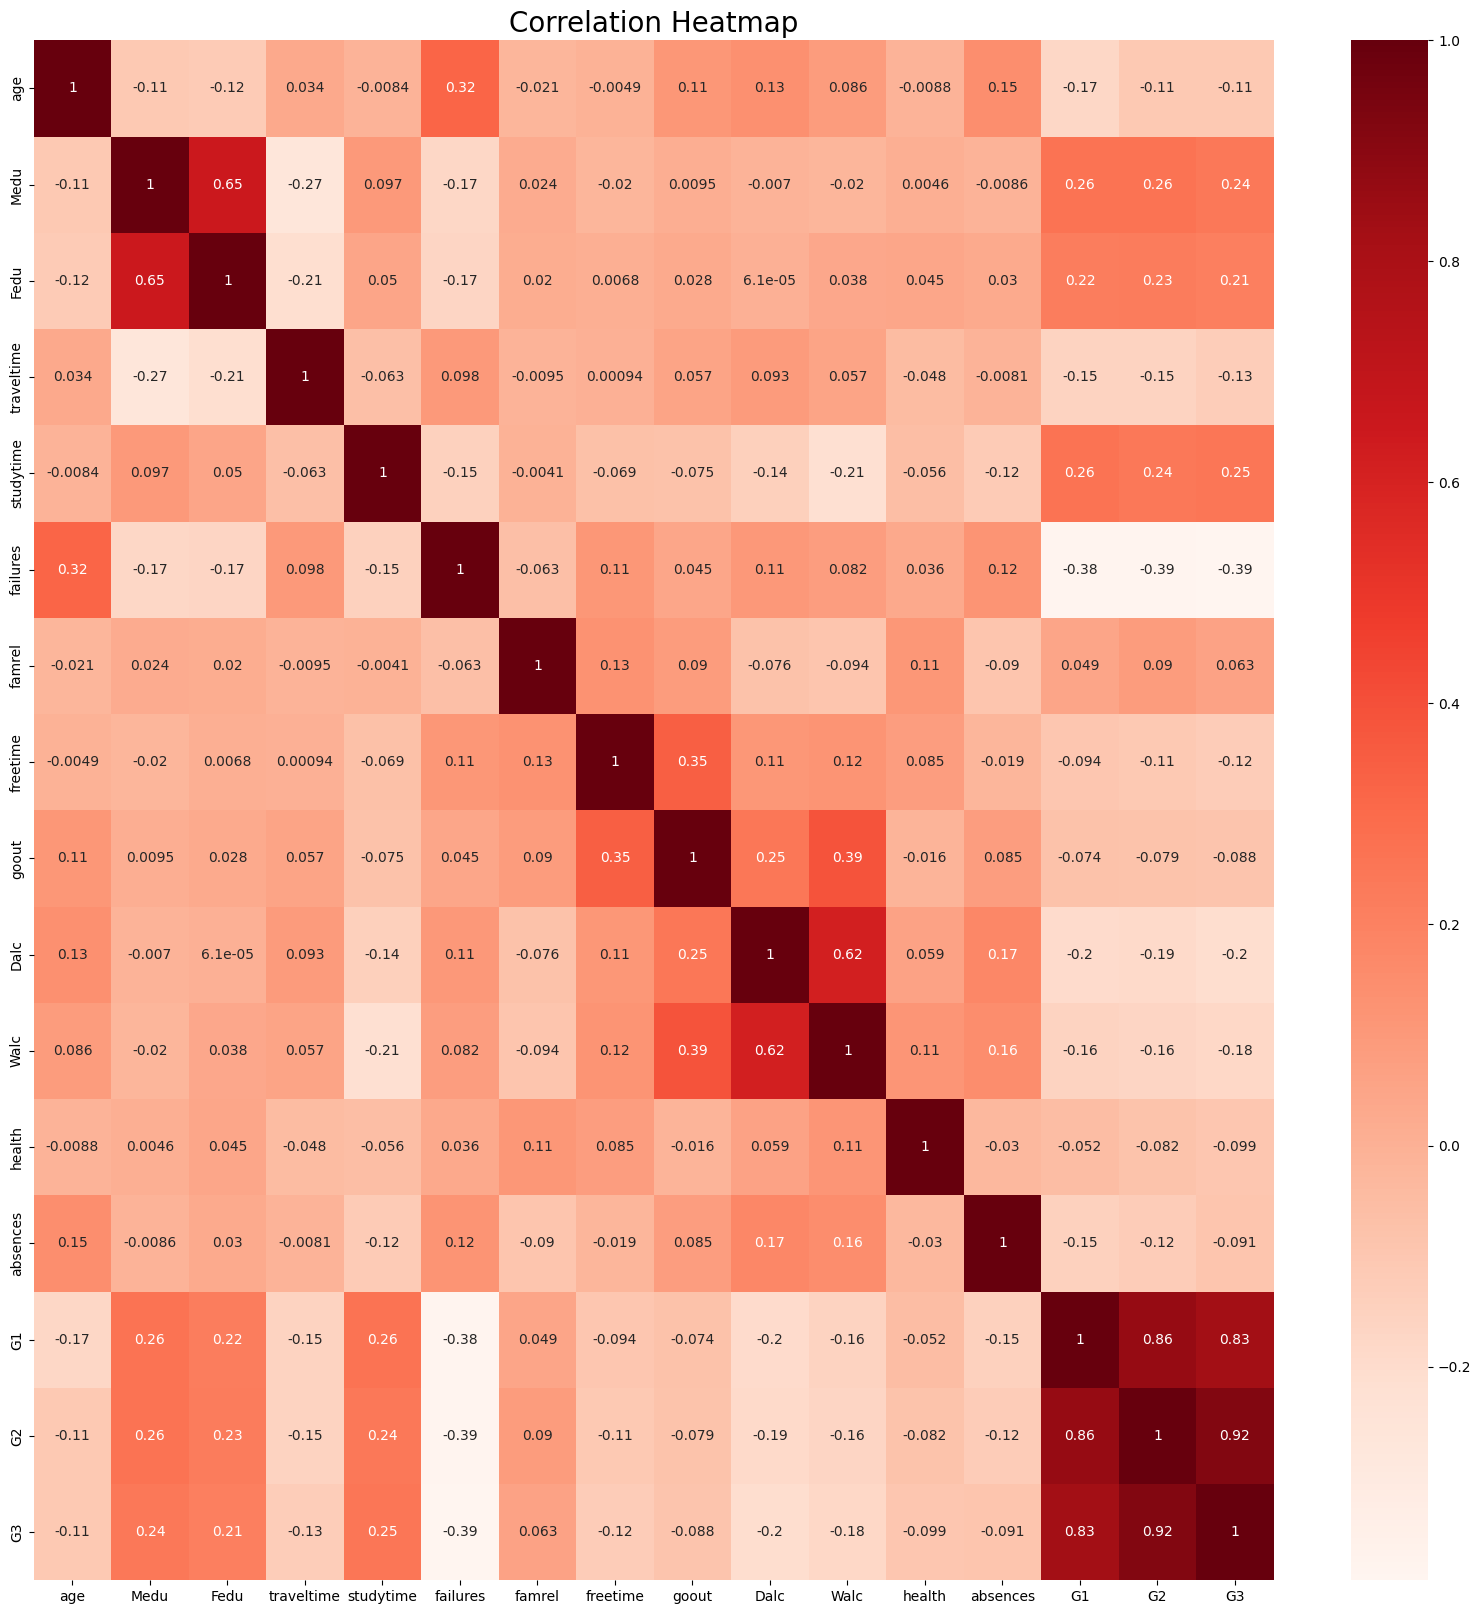

In [8]:
corr=data.corr(numeric_only=True)

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

Видно, что переменные G1 и G2 очень сильно коррелируют с целевой переменной G3, о чем сказано в описании датасета:
> Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd-period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

Поэтому можно попробовать построить модель не учитывая эти два признака.

### Категориальные данные

In [9]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
cat_columns = ["school","sex","address","famsize","Medu","Fedu","Pstatus","Mjob","Fjob","reason","guardian",'traveltime', 'studytime', 'failures' ,'schoolsup', 'famsup','paid' ,'activities', 'nursery', 'higher', 'internet', 'romantic']
len(cat_columns)

22

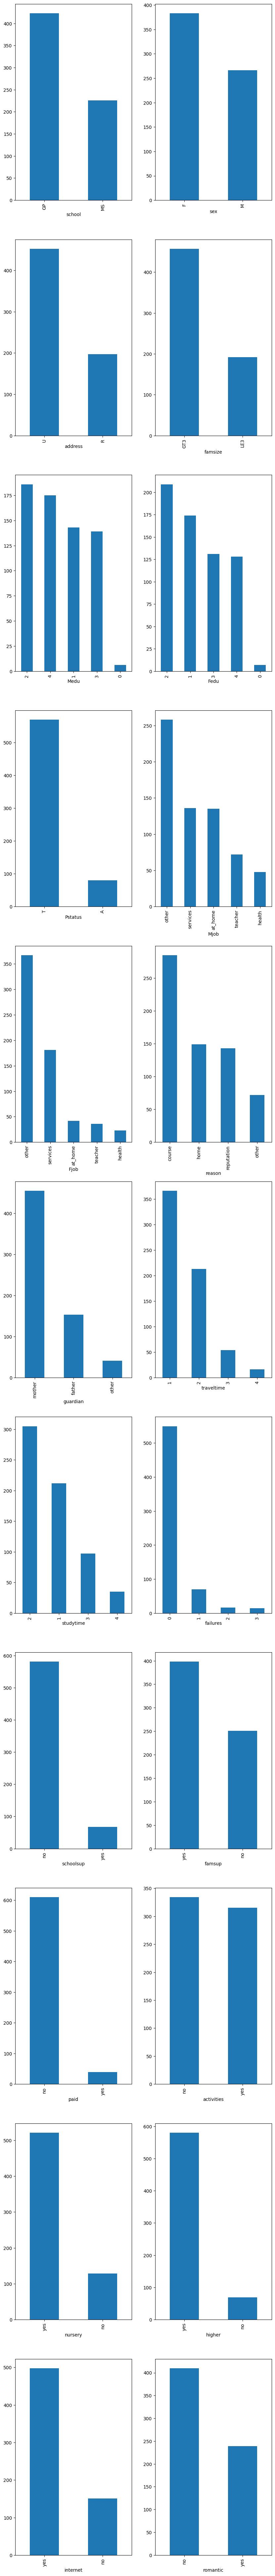

In [11]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(10, 100))

for x in range(0, 11):
    for y in range(0, 2):
            
        data[cat_columns[2*x + y]].value_counts().plot(kind='bar', ax = axes[x,y])

Видно, что присутствует небольшой дизабаланс классов, по некоторым фичам, но это не так страшно.

In [12]:
numeric_columns = list(set(data.columns) - set(cat_columns + ["G2", "G1", "G3"]))

In [13]:
numeric_columns # 8 values

['absences', 'Dalc', 'age', 'goout', 'Walc', 'freetime', 'health', 'famrel']

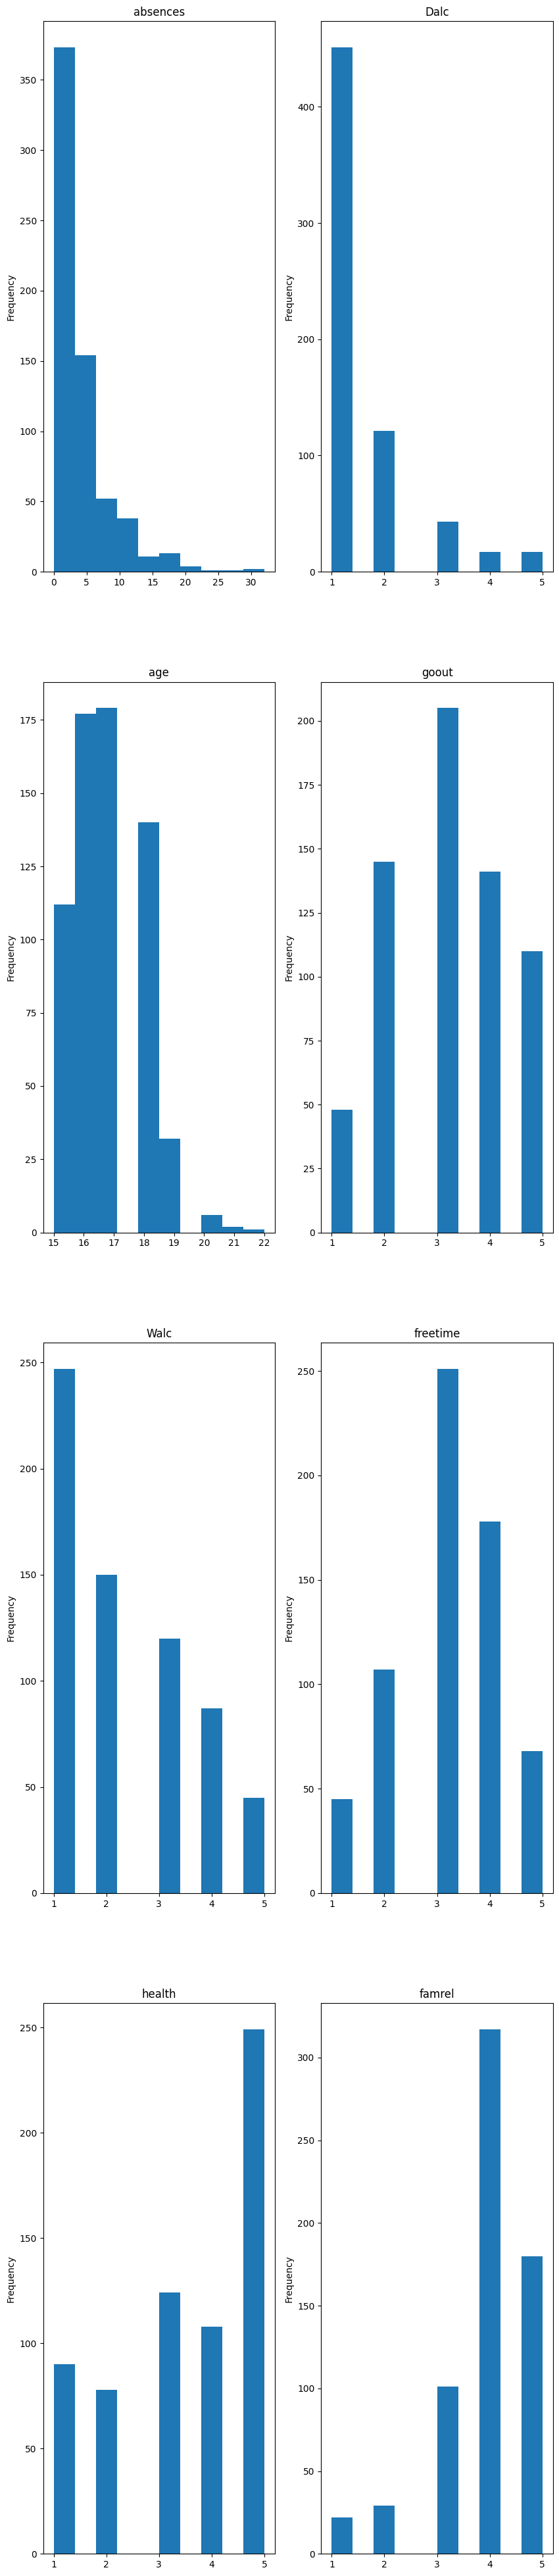

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 50))

for x in range(0, 4):
    for y in range(0, 2):
            
        data[numeric_columns[2*x + y]].plot(kind='hist', ax = axes[x,y], title=numeric_columns[2*x + y])

## Обработка данных

In [15]:
X=pd.get_dummies(data,columns=cat_columns)

In [16]:
X_with_scores = X.drop(['G3'],axis=1)

In [17]:
Y = X["G3"]
X = X.drop(['G1','G2',"G3"], axis = 1)

X

,age,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,3,4,1,1,3,4,True,False,...,True,False,False,True,False,True,True,False,True,False
1,17,5,3,3,1,1,3,2,True,False,...,True,False,True,False,False,True,False,True,True,False
2,15,4,3,2,2,3,3,6,True,False,...,True,False,False,True,False,True,False,True,True,False
3,15,3,2,2,1,1,5,0,True,False,...,False,True,False,True,False,True,False,True,False,True
4,16,4,3,2,1,2,5,0,True,False,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,5,4,2,1,2,5,4,False,True,...,False,True,True,False,False,True,False,True,True,False
645,18,4,3,4,1,1,1,4,False,True,...,True,False,False,True,False,True,False,True,True,False
646,18,1,1,1,1,1,5,6,False,True,...,False,True,False,True,False,True,True,False,True,False
647,17,2,4,5,3,4,2,6,False,True,...,True,False,True,False,False,True,False,True,True,False


In [18]:
Y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2024)

## Бейзлайн
Для базовой модели используем линейную регрессию

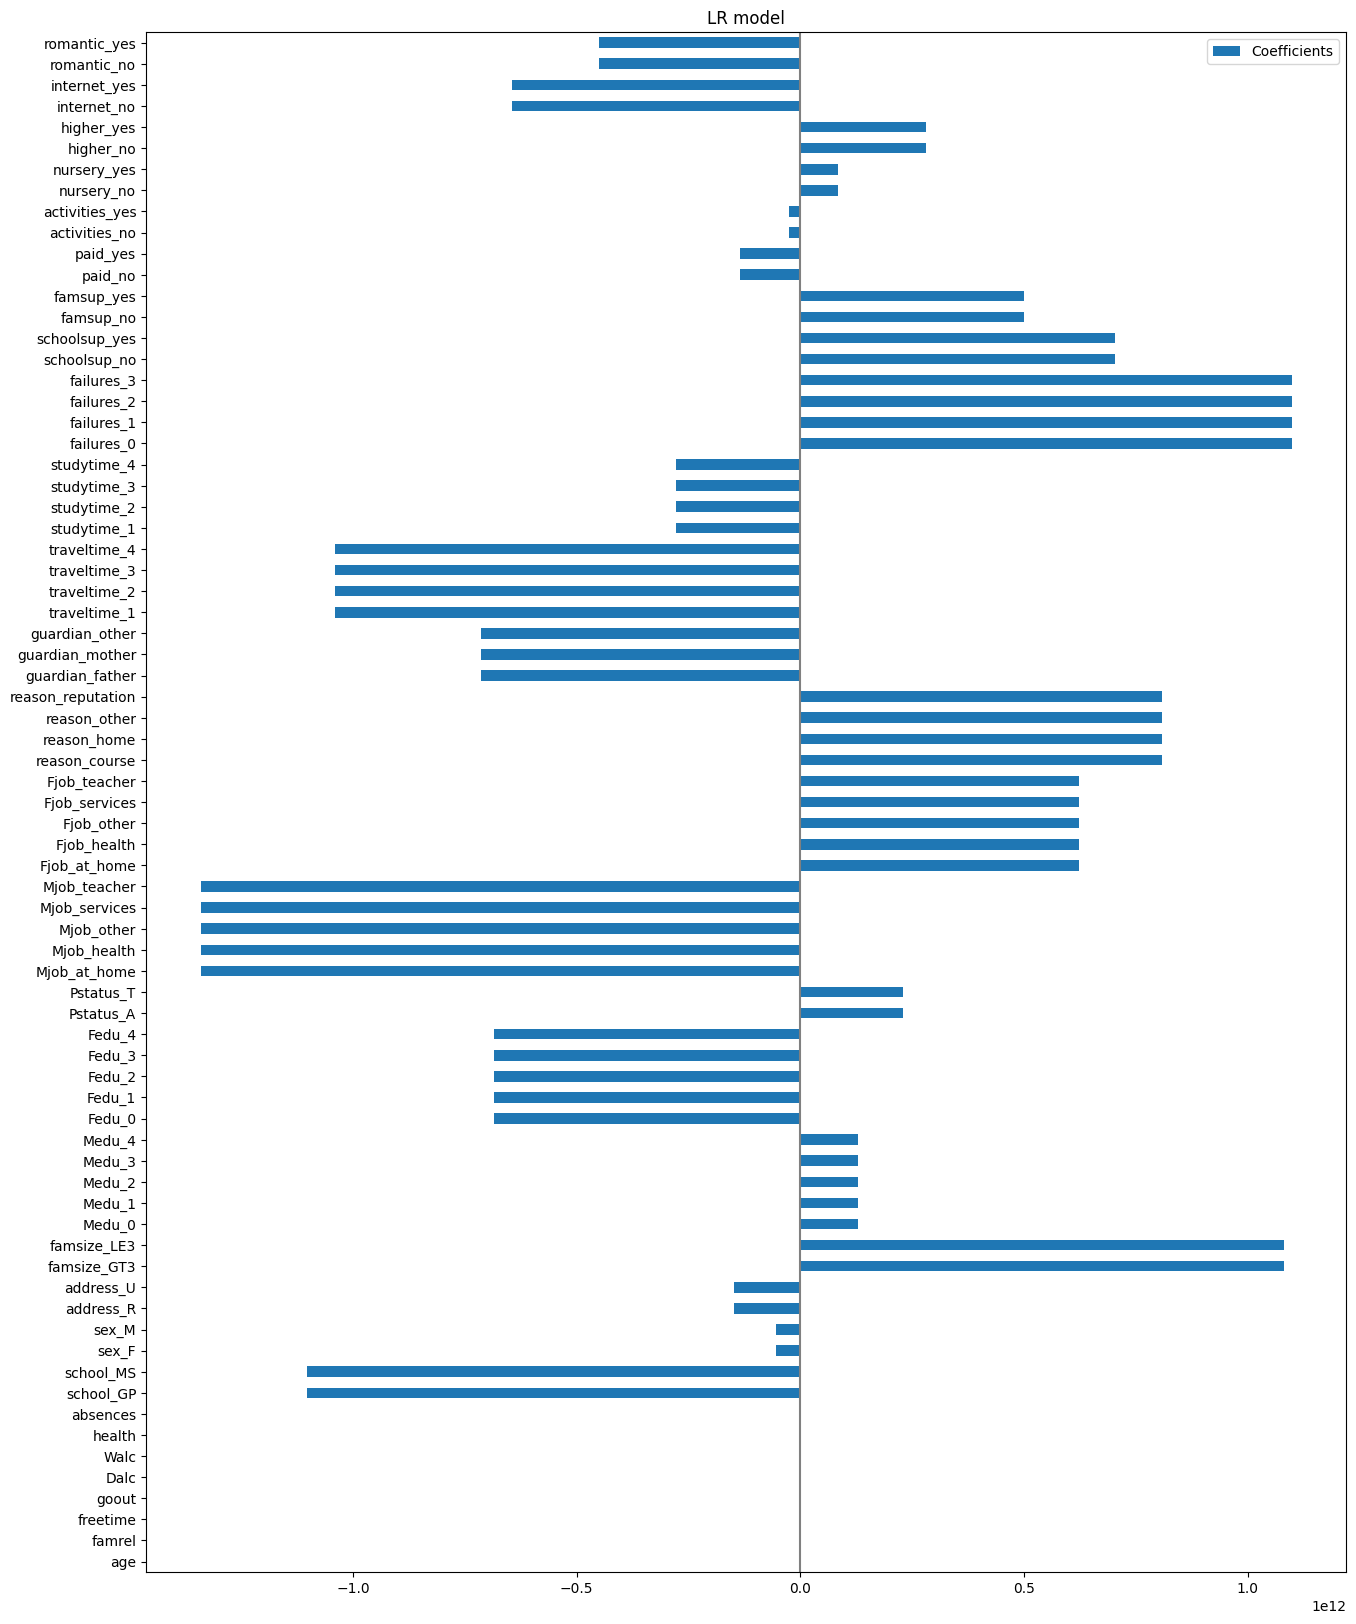

In [20]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

coefs = pd.DataFrame(
    lr.coef_, columns=["Coefficients"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(20, 20))
plt.title("LR model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

## Метрики

### Train

In [21]:
from sklearn.metrics import r2_score

print(r2_score(y_train, lr.predict(X_train)))

0.38270718931984826


In [22]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,lr.predict(X_train)))

6.485941333807502


### Test

In [23]:
from sklearn.metrics import r2_score

print(r2_score(y_test, lr.predict(X_test)))

0.3504998981108993


In [24]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,lr.predict(X_test)))

6.543579014677268


Видим, что у базовой модели не очень хорошее качество:
* R<sup>2</sup> = 0.35
* MSE = 6.54

Поэтому попробуем более сложную модель с подбором гиперпараметров

## Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor(n_estimators=80,random_state=2024)
GB.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=80, random_state=2024)

In [26]:
print("R^2:", r2_score(y_test, GB.predict(X_test)))

R^2: 0.38247917854595037


### Попробуем подбор гиперпараметров

In [27]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]

gs = GridSearchCV(GradientBoostingRegressor(), param_grid=grid,verbose = 1,cv=2, n_jobs=-1)

gs.fit(X_train, y_train)
gs.best_params_

Fitting 2 folds for each of 180 candidates, totalling 360 fits


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [28]:
print("R^2:", r2_score(y_test, gs.predict(X_test)))
print("MSE:", mean_squared_error(y_test,gs.predict(X_test)))

R^2: 0.4119080866194249
MSE: 5.92490423312605


Заметно, что после улучшений наша модель не стала намного лучше. Связать это можно с тем что признаки без G1 и G2 не очень информативны сами по себе, но хоть результат R<sup>2</sup> = 0.39 не очень хорош сам по себе, MSE = 6 означает что в скоре мы в среднем отклоняемся на 6 баллов из 20, что в принципе не так уж и плохо.  

## Интерпретация модели

In [29]:
GB = GradientBoostingRegressor(learning_rate = 0.01, max_depth=9, n_estimators = 500, subsample = 0.5)

GB.fit(X_train, y_train)

print("R^2:", r2_score(y_test, GB.predict(X_test)))
print("MSE:", mean_squared_error(y_test,GB.predict(X_test)))

R^2: 0.3688072216704599
MSE: 6.359136521272237


In [30]:
importances=GB.feature_importances_

In [31]:
feat_importances = {}

for i,features in zip(importances,X_train.columns):
    print("{}: {}".format(features,i))
    feat_importances[features] = i

age: 0.04712958995895349
famrel: 0.038190601218189055
freetime: 0.03458259743922004
goout: 0.047566283769947704
Dalc: 0.043901310322920176
Walc: 0.03576449497194281
health: 0.03327954356155162
absences: 0.08276310416496764
school_GP: 0.014639277360249002
school_MS: 0.01478581574124344
sex_F: 0.009785569515916203
sex_M: 0.007946843157069332
address_R: 0.00808210131232644
address_U: 0.008457425265925241
famsize_GT3: 0.007057962563963554
famsize_LE3: 0.005491984034214311
Medu_0: 0.00024673146045135595
Medu_1: 0.007953704833085362
Medu_2: 0.009800304288385395
Medu_3: 0.006904665762357209
Medu_4: 0.018786750630085888
Fedu_0: 0.0036135286133165048
Fedu_1: 0.018624596472760883
Fedu_2: 0.010902436766261776
Fedu_3: 0.0068523714170121075
Fedu_4: 0.007826139500145464
Pstatus_A: 0.004688662247718029
Pstatus_T: 0.004546715768285785
Mjob_at_home: 0.007095139087009785
Mjob_health: 0.009012073132812628
Mjob_other: 0.009918668160801765
Mjob_services: 0.0073555244685622224
Mjob_teacher: 0.01022570032988

In [32]:
feat_importances = dict(sorted(feat_importances.items(), key=lambda item: item[1]))


feat_importances

{'Medu_0': 0.00024673146045135595,
 'failures_2': 0.001811029376263058,
 'paid_no': 0.00205711764235884,
 'failures_3': 0.002077856562160398,
 'paid_yes': 0.0021874874750987213,
 'traveltime_4': 0.002765196182556351,
 'failures_1': 0.002831183774025652,
 'Fjob_health': 0.003334179908369092,
 'Fedu_0': 0.0036135286133165048,
 'guardian_other': 0.004083114076118673,
 'Pstatus_T': 0.004546715768285785,
 'Pstatus_A': 0.004688662247718029,
 'Fjob_at_home': 0.005147540559431083,
 'famsize_LE3': 0.005491984034214311,
 'internet_no': 0.006719818598100903,
 'Fedu_3': 0.0068523714170121075,
 'activities_yes': 0.006866924154368448,
 'Medu_3': 0.006904665762357209,
 'internet_yes': 0.0069799349016281724,
 'famsize_GT3': 0.007057962563963554,
 'Mjob_at_home': 0.007095139087009785,
 'schoolsup_no': 0.007293889988105591,
 'romantic_yes': 0.0073304417694724155,
 'Mjob_services': 0.0073555244685622224,
 'schoolsup_yes': 0.007529447017806948,
 'romantic_no': 0.007576529328876749,
 'guardian_mother': 0.0

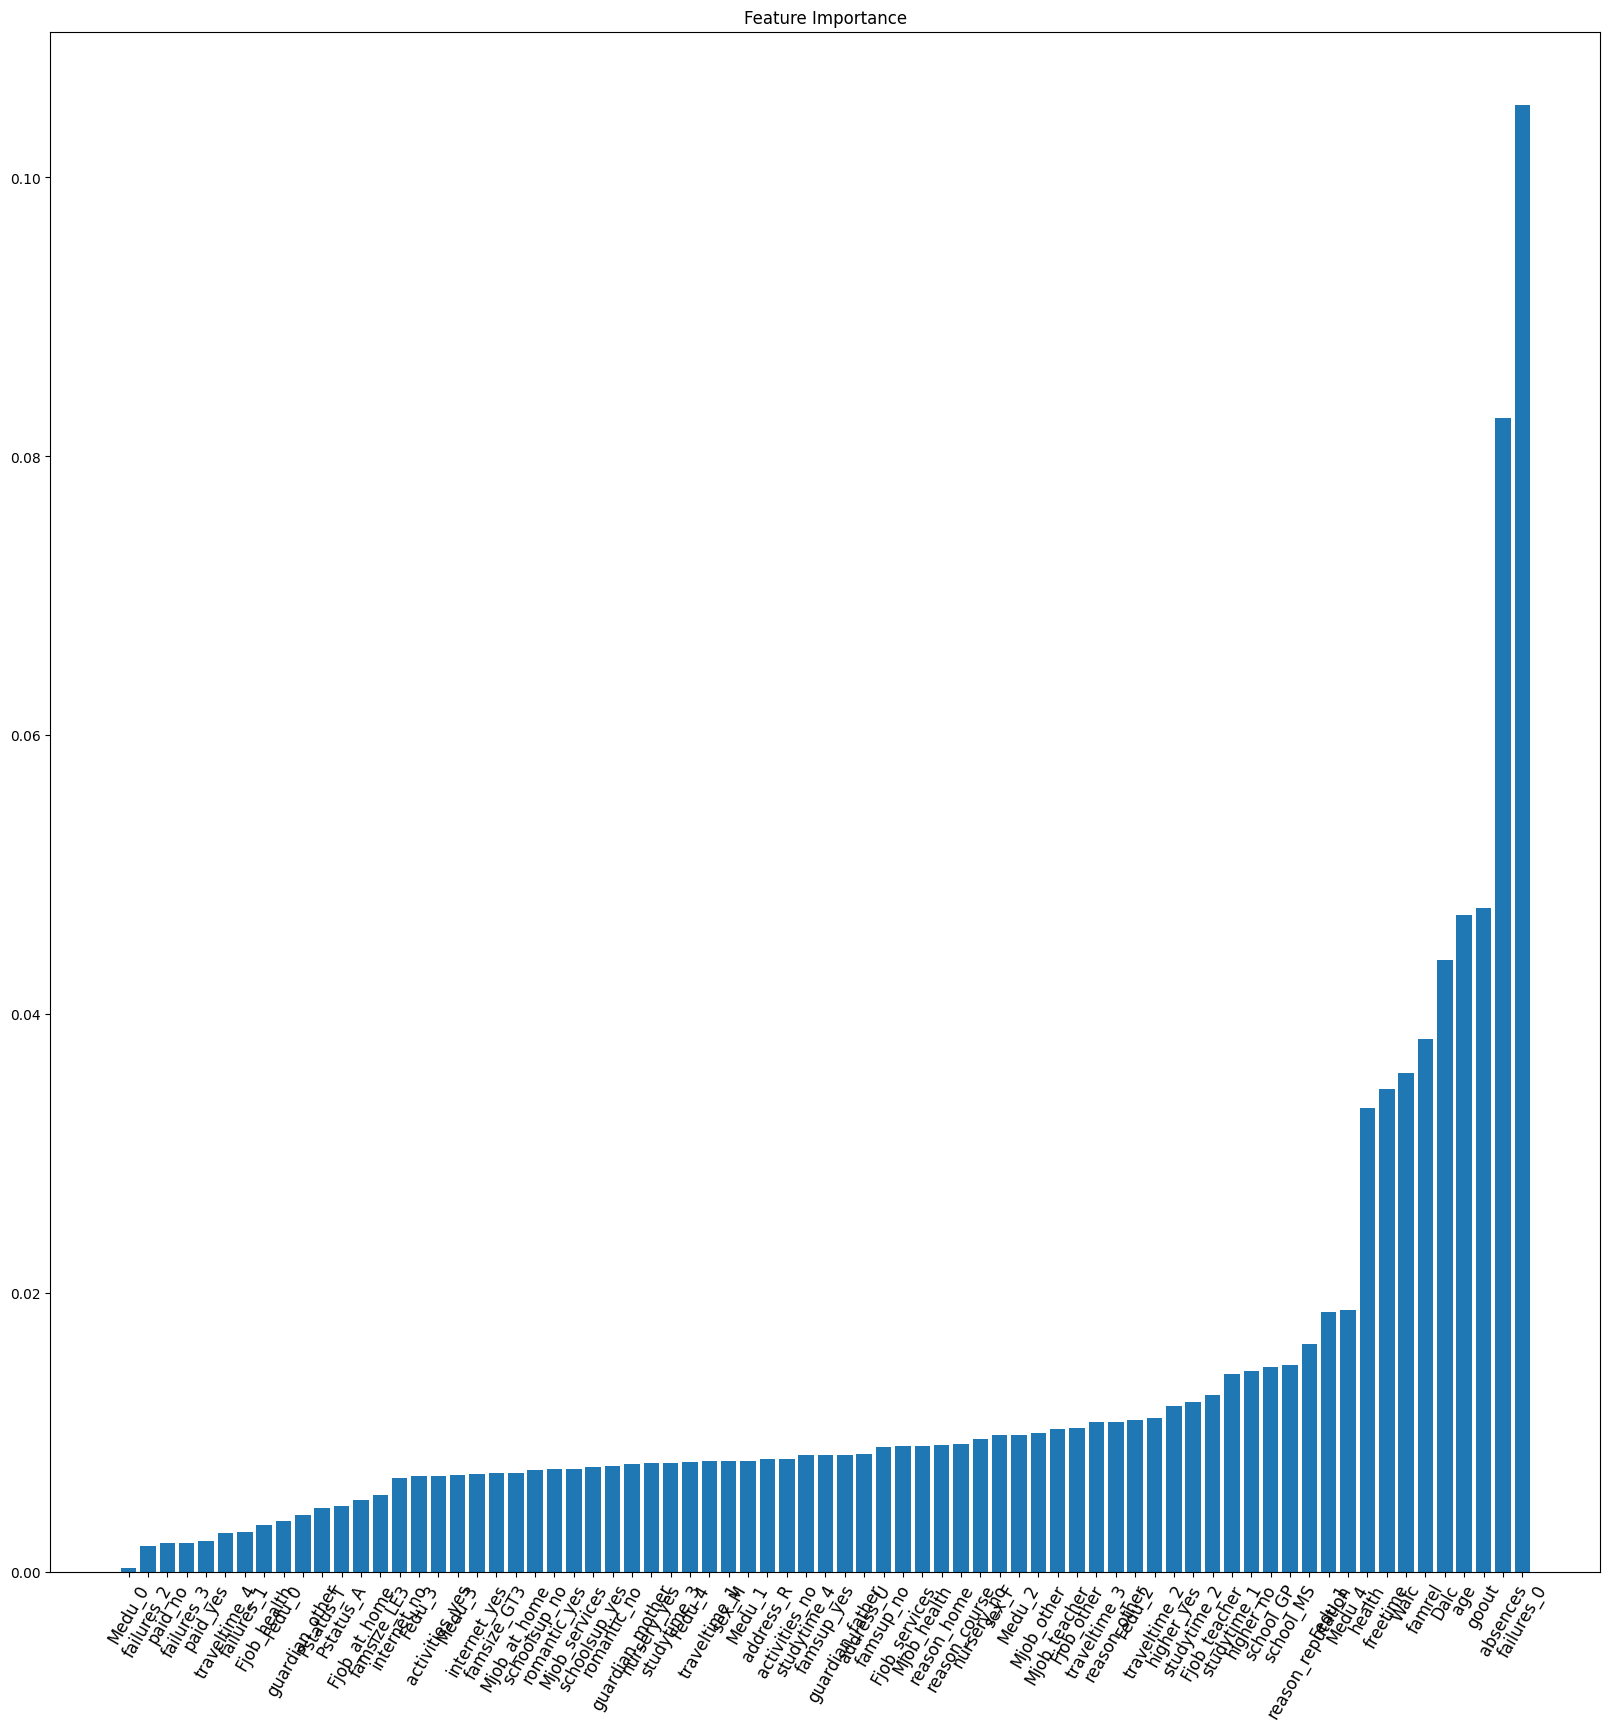

In [33]:
plt.figure(figsize=(20,20))

plt.bar(range(len(feat_importances)), list(feat_importances.values()), align='center')
plt.xticks(range(len(feat_importances)), list(feat_importances.keys()),  rotation=60, fontsize = 12)

plt.title("Feature Importance")
plt.show()

## Заключение

По графику важности фичей можно увидеть, что модель считает, что прогулы и отсутствие провалов - это самые важные фичи для определения итогового результата, что вполне согласуется со здравым смыслом.

Средние результаты модели можно оправдать тем, что самый информативный признак - пропуски занятий, хоть и отражает возможную успеваемость ученика, но по факту не определяет его успешность, потому что студент может не ходить на занятия, но тратить это время, например, на учебу дома.  

## PS
Попробуем построить модель на данных с включенными G1 и G2 

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_with_scores, Y, test_size = 0.2, random_state = 2024)

In [35]:
GB = GradientBoostingRegressor() # learning_rate = 0.01, max_depth=9, n_estimators = 500, subsample = 0.5
 
GB.fit(X_train, y_train)

print("R^2:", r2_score(y_test, GB.predict(X_test)))
print("MSE:", mean_squared_error(y_test,GB.predict(X_test)))

R^2: 0.8088365711402714
MSE: 1.9259319557025347


In [36]:
importances=GB.feature_importances_

feat_importances = {}

for i,features in zip(importances,X_train.columns):
    print("{}: {}".format(features,i))
    feat_importances[features] = i

age: 0.002633288551767298
famrel: 0.0058856902719002365
freetime: 0.0017069176767012533
goout: 0.0022212812845201404
Dalc: 0.007320808970539229
Walc: 0.0022357882512440744
health: 0.0013638680607832427
absences: 0.02405279320539917
G1: 0.03580492320767389
G2: 0.8670151492162332
school_GP: 0.0004841900165634511
school_MS: 0.000955043919368644
sex_F: 0.0033962527747159184
sex_M: 0.003979999875705417
address_R: 0.0
address_U: 0.0
famsize_GT3: 0.00011102380556578798
famsize_LE3: 0.0
Medu_0: 0.0
Medu_1: 2.0681247863374476e-05
Medu_2: 8.98841217869846e-05
Medu_3: 9.72532389844456e-05
Medu_4: 0.00021008965133926624
Fedu_0: 0.0
Fedu_1: 0.00027907598538935897
Fedu_2: 0.0009461351510598447
Fedu_3: 0.00046855108485358287
Fedu_4: 0.00013161062023456872
Pstatus_A: 0.00010036520358971424
Pstatus_T: 0.00017028070282920911
Mjob_at_home: 0.0
Mjob_health: 5.9750148686773975e-05
Mjob_other: 0.0015956602012604114
Mjob_services: 8.121911319766964e-05
Mjob_teacher: 0.0002012479699809671
Fjob_at_home: 0.0001

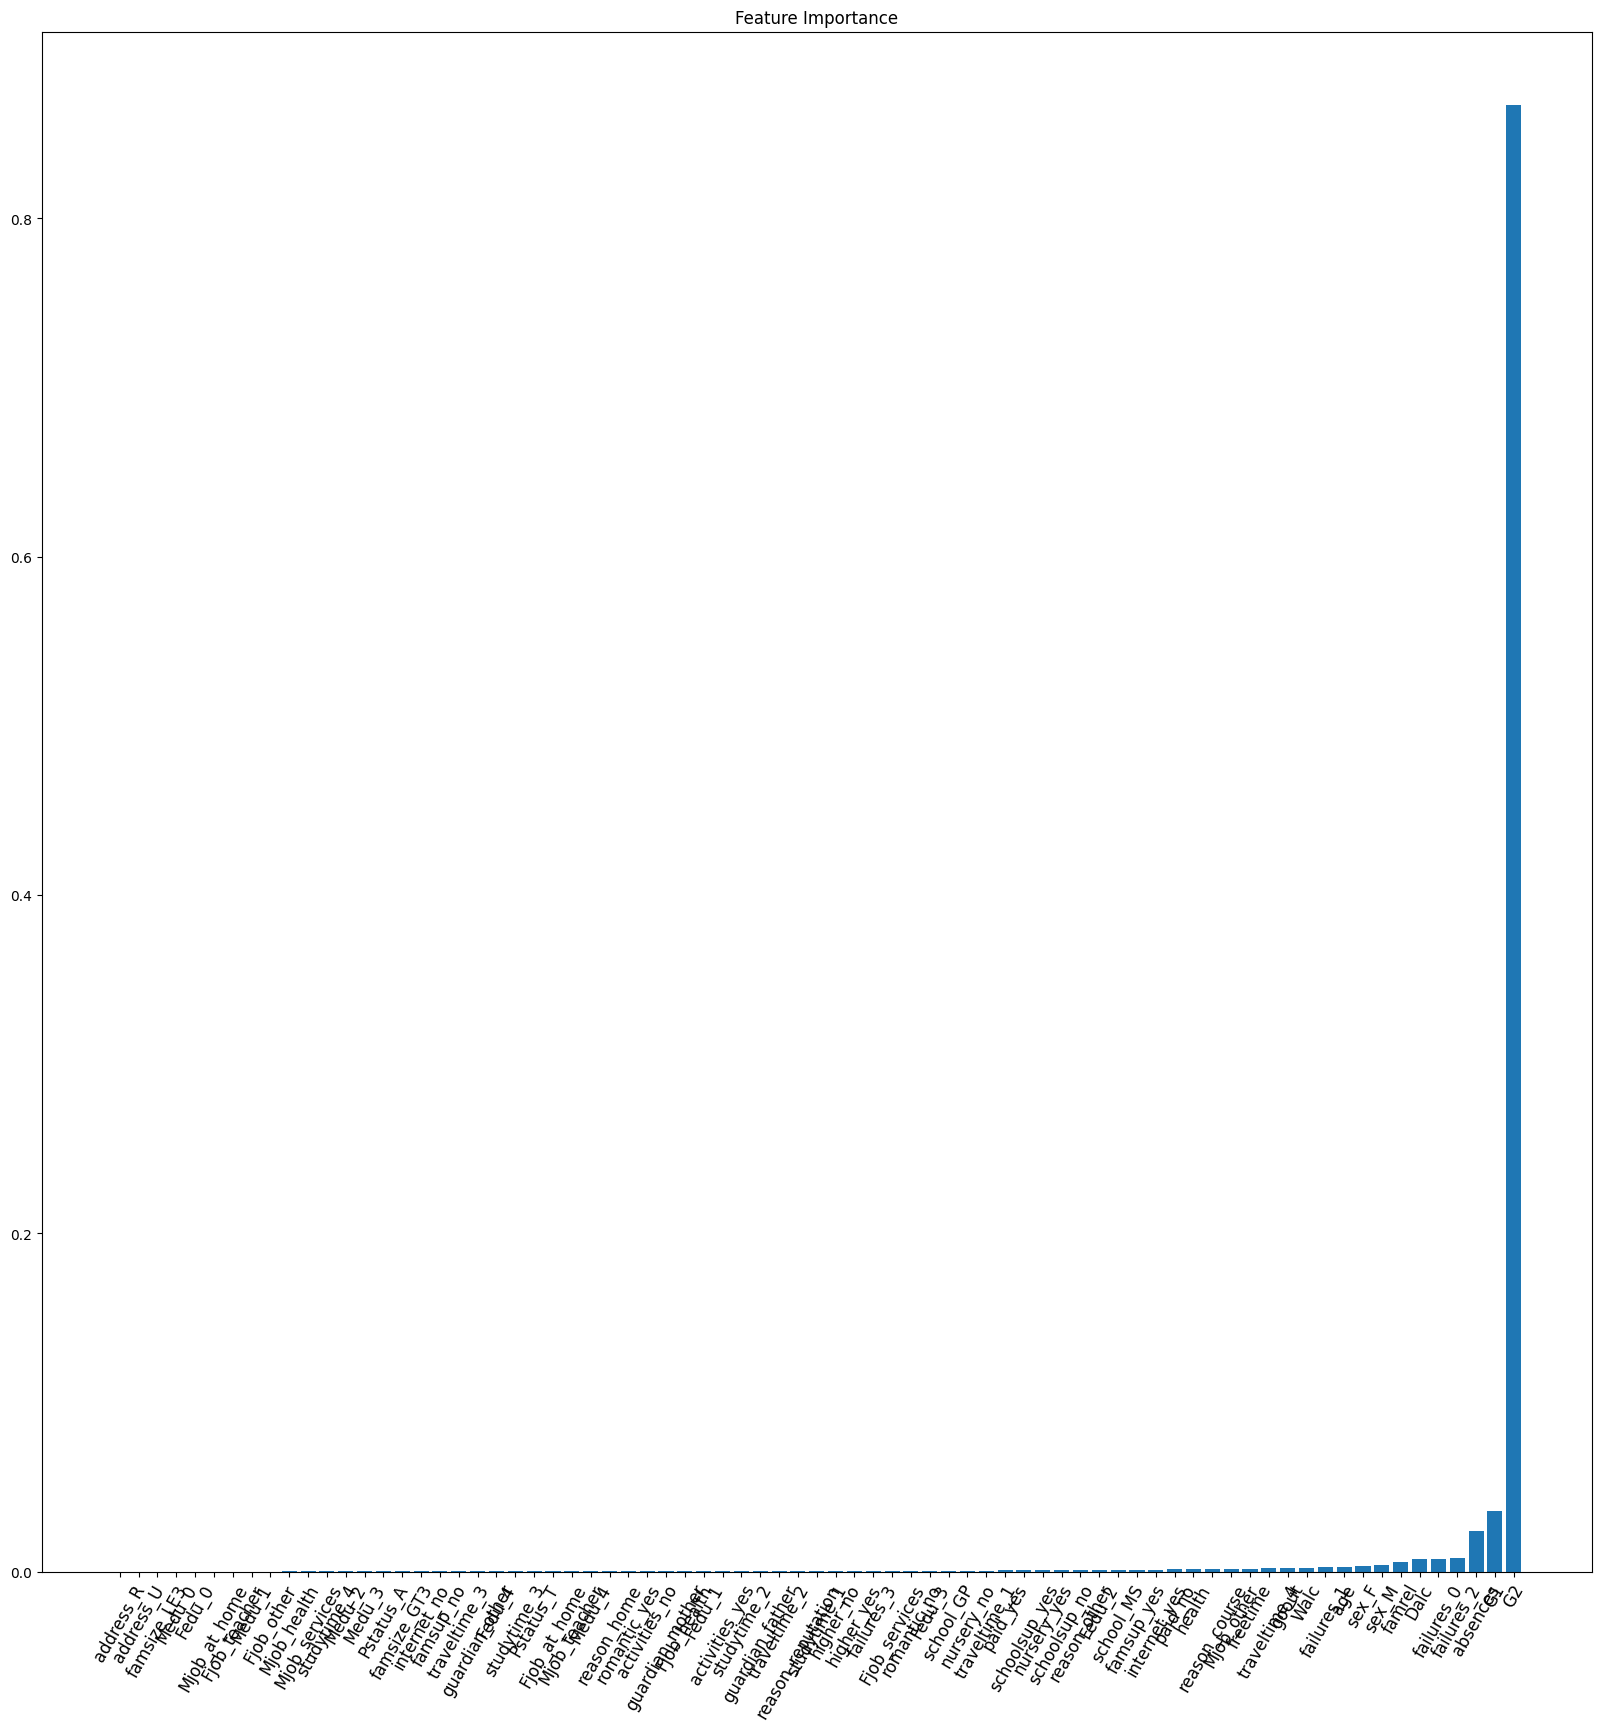

In [37]:
feat_importances = dict(sorted(feat_importances.items(), key=lambda item: item[1]))

plt.figure(figsize=(20,20))

plt.bar(range(len(feat_importances)), list(feat_importances.values()), align='center')
plt.xticks(range(len(feat_importances)), list(feat_importances.keys()),  rotation=60, fontsize = 12)

plt.title("Feature Importance")
plt.show()

Заметно, что G2 настолько сильно кореллирует с целевой переменной, что остальные признаки оказываются малоинформативными.

Гипотезу можно считать подтвержденной